# TOM pattern recognition from time series data : paper plots

```
Author: Gcinizwe Dlamini
```
<hr>

```
Main libraries used :     
- matplotlib
- stumpy
```

In [1]:
import tslearn
from tslearn.generators import random_walks
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
# For matrix profile calculations
import stumpy

In [2]:
from utils import *
import numpy as np
import plotly.express as px
import pandas as pd

In [24]:
all_data = get_data(target_metrics=['total_removed', 'total_added', 'total_changed'])

total filtered repos : 464
Max commits in data : 1838


In [6]:
def calc_profile_matrix(x, m=10, tot_motifs=3):
    """Function to calulate 1-dimensional matrix profiles given subsequence size (m)"""
    mps = {}  # Store the 1-dimensional matrix profiles
    motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
    mps = stumpy.stump(x, m)
    motif_distance = np.round(mps[:, 0].min(), 1)
    motifs_idx = np.argsort(mps[:, 0])[:tot_motifs]
    print(f'The motif pair matrix profile value in is {motif_distance}')
        # motifs_idx.keys()

    return mps, motifs_idx

In [7]:
T = np.random.normal(0,1, 500)
mps, motifs_idx = calc_profile_matrix(T)

The motif pair matrix profile value in is 0.8


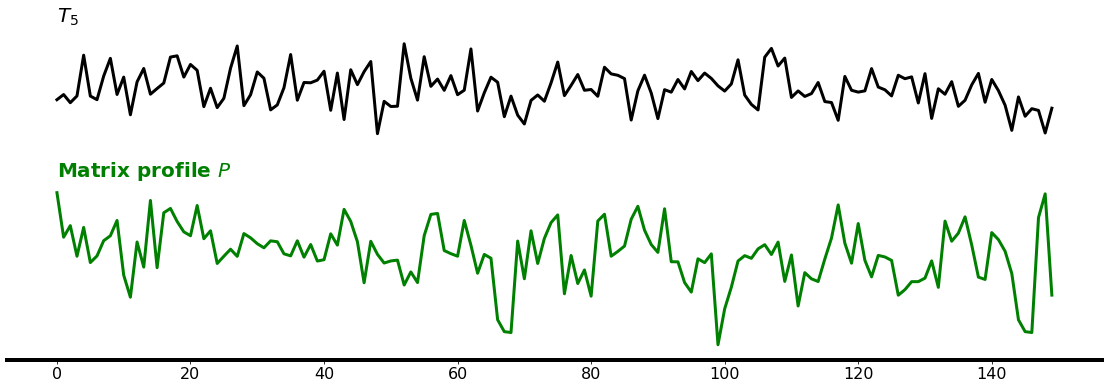

In [63]:
# plt.box(True)
plt.rcParams["figure.figsize"] = (20,3)
fig, ax = plt.subplots()
x = np.arange(500)
for i in range(1):
    tt = np.abs(MinMaxScaler().fit_transform(T.reshape(-1,1))).reshape(-1,1)+3.0
    ax.plot(mps[:,0][:150],c='green', linewidth=3, label = "line 1")
    plt.text(x[0], tt[0]+0.8, f'$T_{5-i}$', {"fontsize":20, 'color':'black','fontweight':'bold'})
    ax.plot(x[:150], tt[:150], c='black', linewidth=3)
    plt.text(x[0], tt[0]-0.8, f'Matrix profile $P$', {"fontsize":20, 'color':'green','fontweight':'bold'})

plt.yticks([])
[i.set_linewidth(4) for i in ax.spines.values()]
plt.xticks(fontsize=16)
# plt.box(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15.5, 5.5)
plt.tight_layout()

plt.savefig('aa.eps',bbox_inches='tight')
plt.show()

## Read data from results

In [71]:
import json, random

json_data = None
data = None
target_metric = 'total_changed'
with open(f'../results/{target_metric}_result.json') as f:
        data = f.read()
        json_data = json.loads(data)

## Randomly select 3 repos and plot

In [91]:
selected = random.sample(json_data.get('4').keys(),3)
selected

['hzdg/django-enumfields',
 'CodetrixStudio/CapacitorGoogleAuth',
 'shellfly/django-vote']

hzdg/django-enumfields


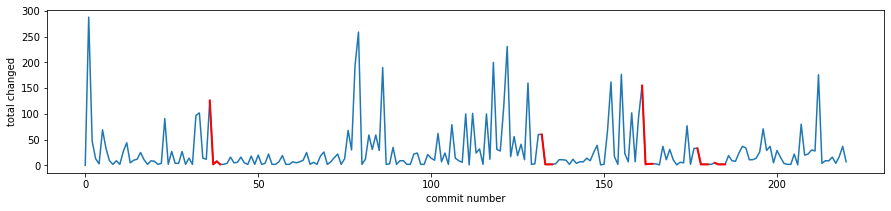

CodetrixStudio/CapacitorGoogleAuth


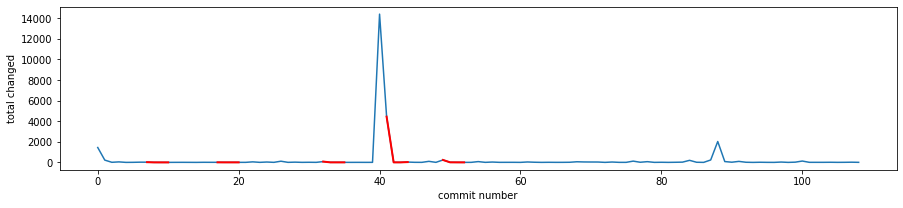

shellfly/django-vote


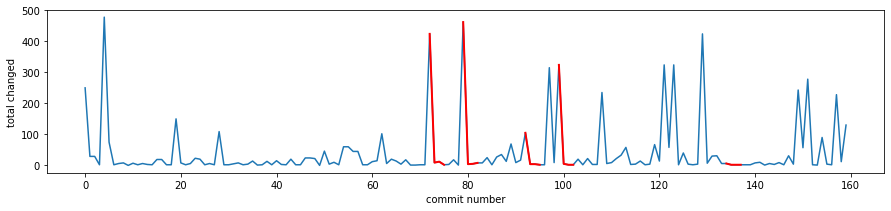

In [98]:
for i, key in enumerate(selected):
    print(key)
    y = all_data[key].get(target_metric)
    plt.figure(figsize=(15, 3))
    plt.plot(np.arange(len(y)), y)
    for pos, val in json_data.get('4').get(key).items():
        start_idx = np.where(all_data[key]['time_stamps'] == pd.to_datetime(val[0]))[0][0]
        yy = all_data[key][target_metric][start_idx:start_idx+4]
        plt.plot(np.arange(start_idx,start_idx+len(yy)),yy, c='red', linewidth=2)
    plt.xlabel('commit number')
    plt.ylabel(target_metric.replace('_',' '))
    plt.savefig(f'plots/patten_example{i+1}.eps',bbox_inches='tight')
    plt.show()